<a href="https://colab.research.google.com/github/yuvisingh311/OPERATING-SYSTEM-/blob/master/Diagnosis_of_covid_19_by_x_ray_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip COVID-19-master.zip

Archive:  COVID-19-master.zip
   creating: COVID-19-master/
  inflating: COVID-19-master/COVID_19_Detection_XRays.ipynb  
  inflating: COVID-19-master/Detecting COVID-19 with Chest X-Ray Images using CNN.jpg  
  inflating: COVID-19-master/README.md  
   creating: COVID-19-master/Results Obtained/
  inflating: COVID-19-master/Results Obtained/Confusion Matrix.png  
  inflating: COVID-19-master/Results Obtained/Training & Validation Accuracy.png  
  inflating: COVID-19-master/Results Obtained/Training & Validation Loss.png  
   creating: COVID-19-master/Train/
   creating: COVID-19-master/Train/Covid/
  inflating: COVID-19-master/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID-19-master/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID-19-master/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID-19-master/Train/Covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID-19-master/Train/Covid/1-s2.0-S092966462030

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
# CNN Based Model in Keras
 
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
 
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
 
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'COVID-19-master/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'COVID-19-master/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 72s 10s/step - loss: 1.0218 - accuracy: 0.5312 - val_loss: 0.6812 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 67s 10s/step - loss: 0.6048 - accuracy: 0.6875 - val_loss: 0.4955 - val_accuracy: 0.8833
Epoch 3/10
7/7 [==============================] - 68s 10s/step - loss: 0.3695 - accuracy: 0.8482 - val_loss: 0.2357 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 64s 9s/step - loss: 0.3431 - accuracy: 0.8795 - val_loss: 0.2914 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 64s 9s/step - loss: 0.2528 - accuracy: 0.9107 - val_loss: 0.1963 - val_accuracy: 0.9500
Epoch 6/10
7/7 [==============================] - 64s 9s/step - loss: 0.2683 - accuracy: 0.9018 - val_loss: 0.2174 - val_accuracy: 0.9500
Epoch 7/10
7/7 [==============================] - 69s 10s/step - loss: 0.2254 - accuracy: 0.9

In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.17978429794311523, 0.9598214030265808]

In [ ]:
model.evaluate_generator(validation_generator)

[0.12857915461063385, 0.9833333492279053]

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
from PIL import Image
for i in os.listdir("./COVID-19-master/Val/Normal/"):
  img = image.load_img("./COVID-19-master/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
for i in os.listdir("./COVID-19-master/Val/Covid/"):
  img = image.load_img("./COVID-19-master/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual, y_test)

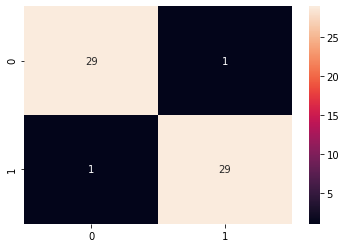

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap=None, annot=True)

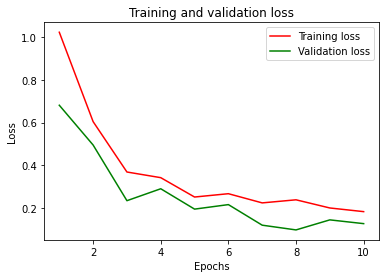

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


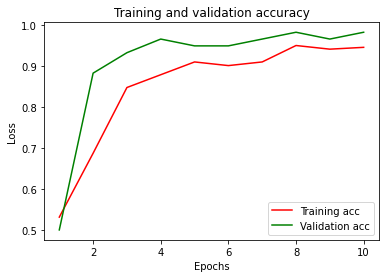

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


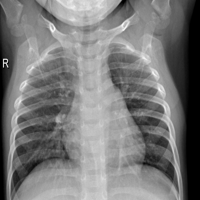

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


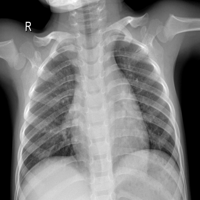

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


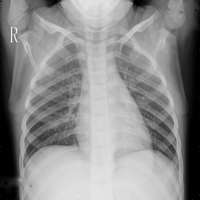

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


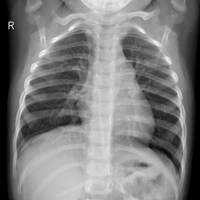

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


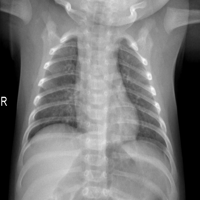

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


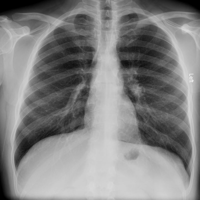

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


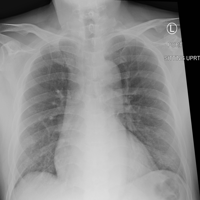

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


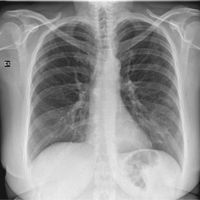

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


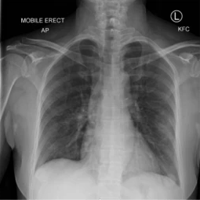

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


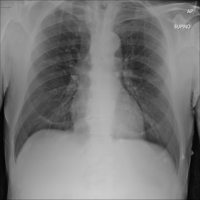

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [ ]:
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   
from PIL import Image
j = 0
for i in os.listdir("./COVID-19-master/Val/Normal/"):
  j = j+1
  pil_img = Image.open('./COVID-19-master/Val/Normal/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./COVID-19-master/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("./COVID-19-master/Val/Covid/"):
  j = j+1
  pil_img = Image.open('./COVID-19-master/Val/Covid/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./COVID-19-master/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if p==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break